Question 1-Implement the linear regression for the univariate problem using gradient descent for the data file ice_cream_sales_vs_temperature.csv. Plot the cost function and the best-fit line.

489.42797143629105 50.32592717408318


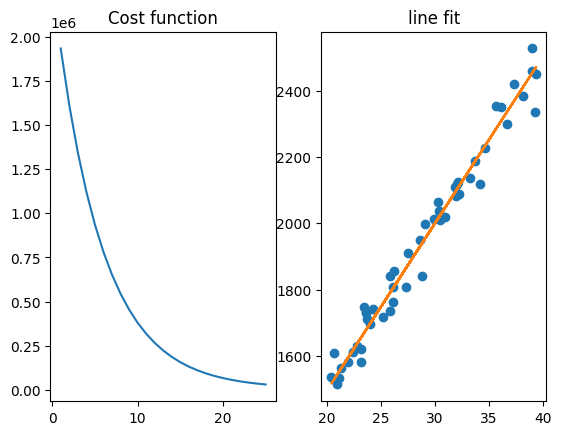

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def grad_descent(x0,f,grad_f,thresh):
    x=np.array(x0)
    lim=0
    cost=[]
    while( np.sqrt(grad_f(*x)[0]**2+grad_f(*x)[1]**2)>thresh ):
        cost.append(f(*x))
        x=x-0.0001*grad_f(*x)
        

    return cost,x

def lin_reg(xi,yi):
    m=len(xi)
    f=lambda w0,w1: np.sum((w0+w1*xi-yi)**2/(2*m))
    grad_f=lambda w0,w1:np.array([np.sum((w0+w1*xi-yi)/m),np.sum(((w0+w1*xi-yi)*xi)/m)])
    cost,(w0,w1)=grad_descent([0,0],f,grad_f,1)
    print(w0,w1)
    fig,ax=plt.subplots(1,2)
    p=np.linspace(-10,10,100)
    ax[0].plot([i for i in range(1,26)],cost[:25])
    ax[0].set_title('Cost function')
    ax[1].set_title('line fit')
    ax[1].plot(xi,yi,'o')
    ax[1].plot(xi,w0+w1*xi)
df=pd.read_csv('ice_cream_sales_vs_temperature.csv')
X=np.array(df['Temperature_C'])
Y=np.array(df['Ice_Cream_Sales'])

lin_reg(X,Y)




Question 2-Using the dataset, 3D_printing_data.csv,  find how the 3D printing parameters (layer height, wall thickness, infill density, nozzle temperature, bed temperature, print speed, material, and fan speed) affect the tensile strength of the printed object.

In [ ]:
def grad_descent(x0,f,grad_f,thresh,max_iter=1000):
    x=np.array(x0)
    lim=0
    while(np.max(grad_f(x))>thresh):
        #print(f'grad:{grad_f(x)}')
        x=x-0.001*grad_f(x)
    return x

def lin_reg(x,y):
    m=len(x)
    J=lambda W: np.sum((np.array(W)@np.transpose(x)-y)**2/(2*m))
    grad_J=lambda W: (1/m)*((((np.array(W)@np.transpose(x)-y)@x)))
    w=grad_descent([100]*x.shape[1],J,grad_J,0.0002)
    return w
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())
df=pd.read_csv('3D_printing_data.csv')
df['infill_pattern'] = df['infill_pattern'].replace(['grid', 'honeycomb'], [0, 1])
df['material'] = df['material'].replace(['abs', 'pla'], [0, 1])
df.drop(columns=['infill_pattern','roughness','elongation'],inplace=True)

for col in df.columns:
    if col not in ["infill_pattern", "material",'tension_strenght']:  
        df[col] = min_max_normalize(df[col])

Y=np.array(df['tension_strenght'])
X=df.drop('tension_strenght',axis=1).values.tolist()
X=np.array(X)

w=lin_reg(X,Y)

for col_name, weight in zip(df.drop('tension_strenght', axis=1).columns, w):
    print(f'Weight for {col_name}: {weight}')


from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False)
reg.fit(X, Y)
print("Weights from sklearn LinearRegression:", reg.coef_)




C:\Users\adikw\AppData\Local\Temp\ipykernel_33756\1471880660.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['infill_pattern'] = df['infill_pattern'].replace(['grid', 'honeycomb'], [0, 1])
C:\Users\adikw\AppData\Local\Temp\ipykernel_33756\1471880660.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['material'] = df['material'].replace(['abs', 'pla'], [0, 1])


Weight for layer_height: 11.436326759233555
Weight for wall_thickness: 11.940302128912368
Weight for infill_density: 12.988315886104438
Weight for nozzle_temperature: 1.8016546740988555
Weight for bed_temperature: -2.958812710613721
Weight for print_speed: 0.22531847477303277
Weight for material: 7.68264920317465
Weight for fan_speed: -2.958812710613721
Weights from sklearn LinearRegression: [11.43970453 11.9449424  12.99297154  1.77715849 -2.95125311  0.22905558
  7.67259707 -2.95125311]


Question 3- Fit polynomial equations of degree 1  to 4  for the data noisy_point_data.csv.  Determine the values of coefficients that minimize the residual error(RMSE). Plot the original data with your best-fit line. Explain why your chosen polynomial degree is appropriate for this data
Also, find the nature of the curve.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("noisy_point_data.csv")

y = np.array(df['y'])
x = np.array(df['x'])
x2 = x**2
x3 = x**3
x4 = x**4

degree = 2

w = np.array([1]*(degree+1))

X = []

if degree == 1:
    for i in range(len(x)):
        temp = [1,x[i]]
        X.append(temp)

if degree == 2:
    for i in range(len(x)):
        temp = [1,x[i],x2[i]]
        X.append(temp)

if degree == 3:
    for i in range(len(x)):
        temp = [1,x[i],x2[i],x3[i]]
        X.append(temp)

if degree == 4:
    for i in range(len(x)):
        temp = [1,x[i],x2[i],x3[i],x4[i]]
        X.append(temp)

X = np.array(X)
def gradient(x,y,w,m):

    return (np.transpose(np.transpose(x@w-y)@x))/m

def lin_reg(x,y,w,d,a=0.0001,thresh=0.001):
    m = len(x)
    count = 0

    grad_j = [1]*(d+1)
    while max(grad_j)>thresh and count < 5000:
        grad_j = gradient(x,y,w,m)
        w_ = w - a*grad_j
        w = w_

        rmse = np.sum((x@w_ - y)**2)/(2*m)


    return w_, rmse

print(lin_reg(X,y,w,degree))

(array([ 1.11937243, -2.98891539,  1.99524664]), 4.304244949492322)


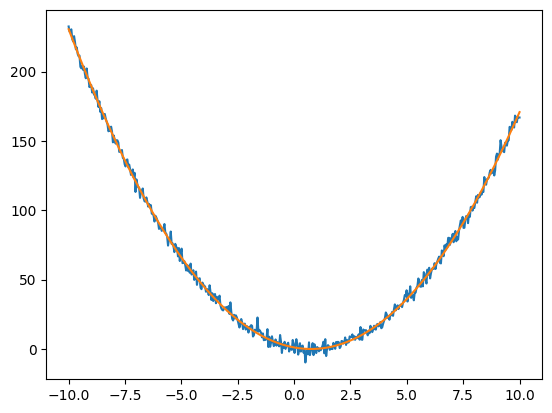

In [89]:
import matplotlib.pyplot as plt
df = pd.read_csv("noisy_point_data.csv")

y = np.array(df['y'])
x = np.array(df['x'])
plt.plot(x,y)
y_pred=X@w_
plt.plot(x,y_pred)


Question 4- Using steepest gradient descent, find all the local minima for the function  J(x1, x2) = (5*x1)^2+(x2)^2. While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point.

Minima by setting alpha method: [2.24356279e-15 9.98430609e-03]
Minima by Line search method: [0.00011581 0.00010818]


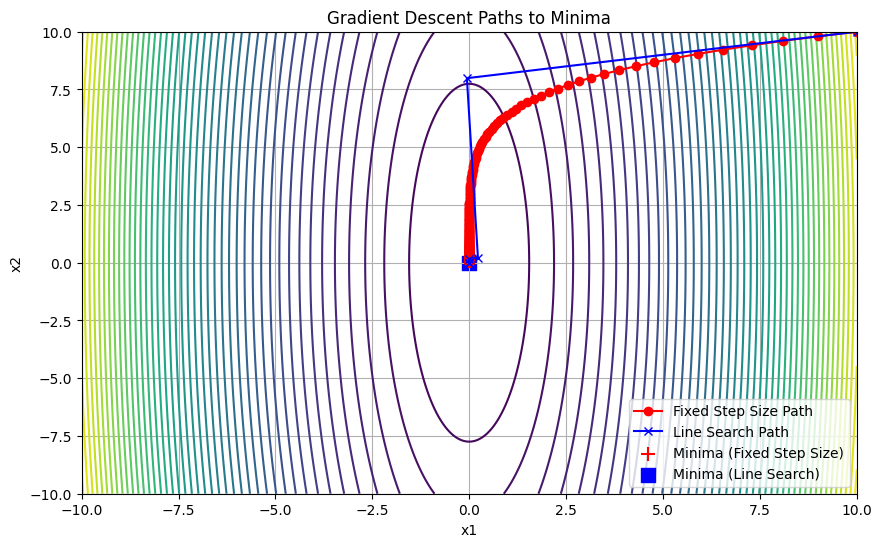

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def find_bracket(f):
    a, b = -2, 1
    n = 10
    h = (b - a) / n
    w1, w2, w3 = a, a + h, a + 2 * h
    
    while w3 <= b:
        if f(w1) >= f(w2) and f(w2) <= f(w3):
            return (w1, w3)
        else:
            w1, w2, w3 = w2, w3, w3 + h

def interval_halving(J, a, b, thresh=0.002):
    wm = (a + b) / 2
    L = (b - a)
    
    while abs(L) > thresh:
        w1 = a + L / 4
        w2 = b - L / 4
        if J(w1) < J(wm):
            b, wm = wm, w1
        elif J(w2) < J(wm):
            a, wm = wm, w2
        else:
            a, b = w1, w2
        L = b - a
    return wm

def grad_descent(x0, f, grad_f, thresh):
    x = np.array(x0)
    vals = [x.copy()]
    
    while (np.sqrt(grad_f(*x)[0]**2 + grad_f(*x)[1]**2)) > thresh:
        g = lambda alpha: f(*(x - alpha * grad_f(*x)))
        a, b = find_bracket(g)
        alpha = interval_halving(g, a, b)
        x = x - alpha * grad_f(*x)
        vals.append(x.copy())
    
    return x, vals

def grad_descent_setalpha(x0, f, grad_f, thresh, lr=0.001):
    x = np.array(x0)
    vals = [x.copy()]
    
    while (np.sqrt(grad_f(*x)[0]**2 + grad_f(*x)[1]**2)) > thresh:
        x = x - lr * grad_f(*x)
        vals.append(x.copy())
    
    return x, vals

J = lambda x1, x2: (5 * x1) ** 2 + (x2) ** 2
grad_J = lambda x1, x2: np.array([10 * x1, 2 * x2])

w_lr, path_lr = grad_descent_setalpha([10, 10], J, grad_J, 0.02, 0.01)
w_line_search, path_ls = grad_descent([10, 10], J, grad_J, 0.002)

print(f"Minima by setting alpha method: {w_lr}")
print(f"Minima by Line search method: {w_line_search}")


x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = J(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')

path_lr = np.array(path_lr)
path_ls = np.array(path_ls)

plt.plot(path_lr[:, 0], path_lr[:, 1], marker='o', color='red', label="Fixed Step Size Path")
plt.plot(path_ls[:, 0], path_ls[:, 1], marker='x', color='blue', label="Line Search Path")

plt.scatter(w_lr[0], w_lr[1], color='red', s=100, marker='+', label="Minima (Fixed Step Size)")
plt.scatter(w_line_search[0], w_line_search[1], color='blue', s=100, marker='s', label="Minima (Line Search)")

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Paths to Minima')
plt.legend(loc='lower right')
plt.grid()
plt.show()


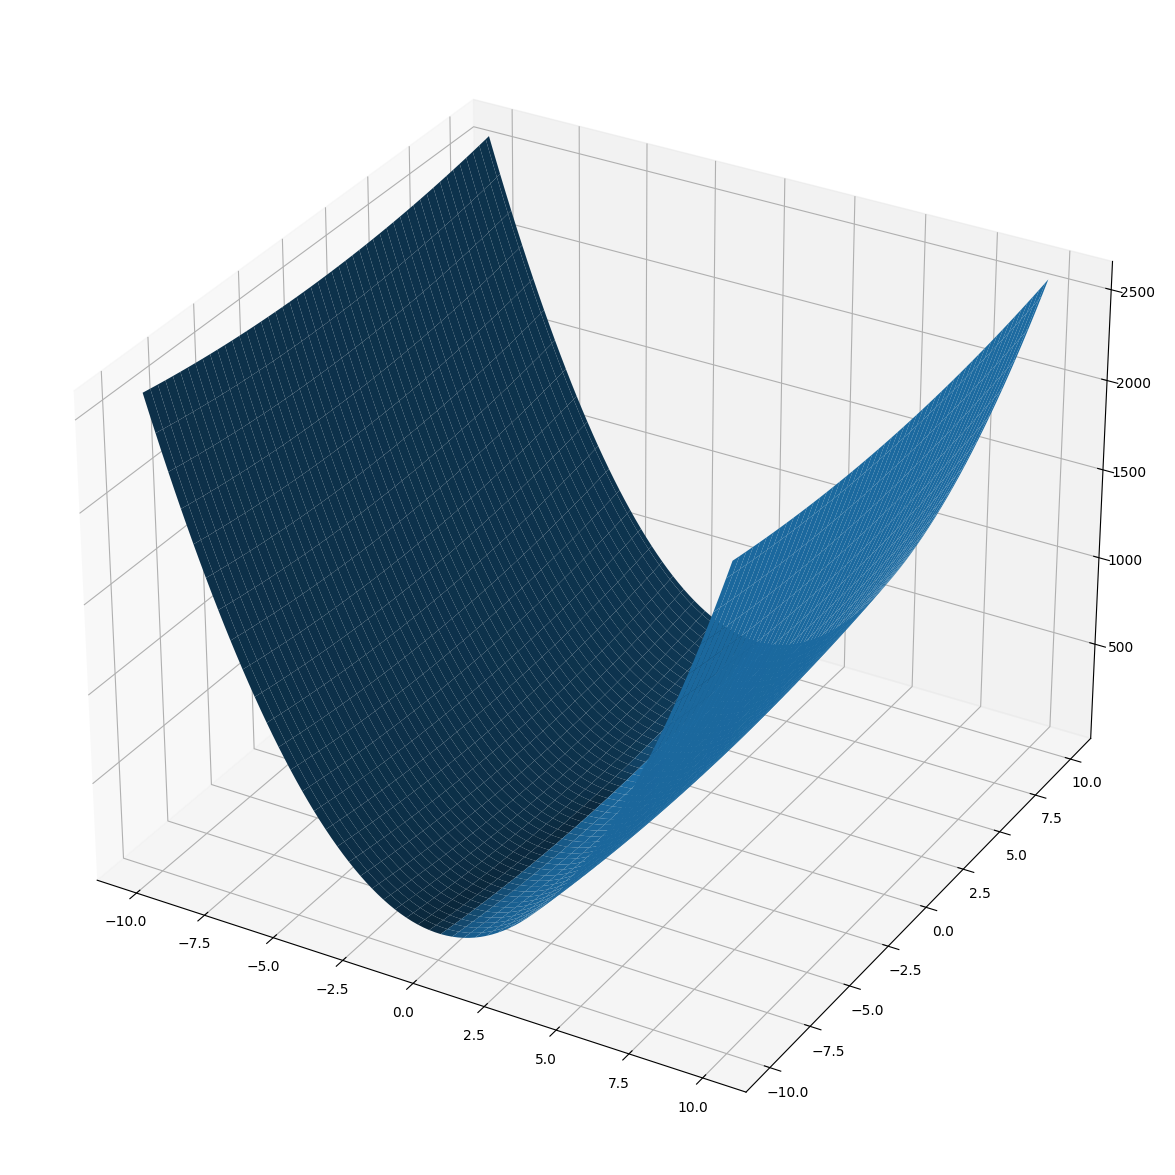

In [7]:
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
X,Y=np.meshgrid(x,y)

Z=J(X,Y)
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)